# Predicting Song Popularity Using Spotify Song Features

### Introduction

The objective of this project is to predict whether a song will be popular in Spotify based the audio features of a track.

### The Data
The dataset consits of 16 features and 1 target variable "popularity".
The features include the tempo, key, loudness, time signature, duration in milliseconds, acousticness, danceability, energy, instrumentalness, liveness, mode, speechiness, and valence. There are 130,663 songs with a popularity rating of 0 - 100 based on number of plays a track receives which can differ month to month. A new feature "hot" was created to identify tracks with a popularity rating of >= 50.

#### Spotify Song Features April 2019
 - https://www.kaggle.com/tomigelo/spotify-audio-features
#### Column Information
 - Audio Features Description: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/
 
 - Acousticness: 0.0 - 1.0 confidence measure whether track is acoustic
 - Danceability: 0.0 - 1.0 describes how suitable a track is for dancing
 - Duration_MS: Duration of Track in Milliseconds
 - Energy: 0.0 - 1.0 Perceptual measure of intensity and activity.
 - Insrumentalness: 0.0 - 1.0 Predicts whether a track contain no vocals
 - Key: Estimated key of the track
    -1 = No key detected
     0 = C
     1 = C#/Db
     2 = D
     3 = D#/Eb
     4 = E
     5 = F
     6 = F#/Gb
     7 = G
     8 = G#/Ab
     9 = A
     10 = A#/Bb
     11 = B  
 - Liveness: Detects presence of an audience in the recording.
 - Loudness: -60 - 0 db Overall loudness of a track in decibels(dB)
 - Mode: 0 - 1 indicates whether track is in a major(1) or minor(0) scale
 - Speechiness: 0.0 - 1.0 detects presence of spoken words in a track
 - Tempo: Overall estimated tempo of track in beats per minute (BPM)
 - Time_Signature: Estimated overall time signature of a track (4/4, 3/4.etc)
 - Valence: 0.0 - 1.0 describes musical positiveness conveyed by track
 - Popularity: Value based on the number of pays a track receives (changes)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

In [2]:
spotify_df = pd.read_csv("spotify.csv")
spotify_df.head()

artist_name                track_id  \
0          YG  2RM4jf1Xa9zPgMGRDiht8O   
1          YG  1tHDG53xJNGsItRA3vfVgs   
2       R3HAB  6Wosx2euFPMT14UXiWudMy   
3  Chris Cooq  3J2Jpw61sO7l6Hc7qdYV91   
4  Chris Cooq  2jbYvQCyPgX3CdmAzeVeuS   

                                       track_name  acousticness  danceability  \
0  Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj      0.005820         0.743   
1                    BAND DRUM (feat. A$AP Rocky)      0.024400         0.846   
2                                   Radio Silence      0.025000         0.603   
3                                         Lactose      0.029400         0.800   
4                             Same - Original mix      0.000035         0.783   

   duration_ms  energy  instrumentalness  key  liveness  loudness  mode  \
0       238373   0.339             0.000    1    0.0812    -7.678     1   
1       214800   0.557             0.000    8    0.2860    -7.259     1   
2       138913   0.723             0.000    9    0.0824    -5.890     0   
3       125381   0.579             0.912    5    0.0994   -12.118     0   
4       124016   0.792             0.878    7    0.0332   -10.277     1   

   speechiness    tempo  time_signature  valence  popularity  
0       0.4090  203.927               4    0.118          15  
1       0.4570  159.009               4    0.371           0  
2       0.0454  114.966               4    0.382          56  
3       0.0701  123.003               4    0.641           0  
4       0.0661  120.047               4    0.928           0

In [3]:
# check number of rows and columns
spotify_df.shape

(130663, 17)

In [4]:
# dropped unwanted features artist_name, track_id and track_name
spotify_df = spotify_df.drop("track_name", axis = 1)

In [5]:
spotify_df = spotify_df.drop("artist_name", axis = 1)

In [6]:
spotify_df = spotify_df.drop("track_id", axis = 1)

In [7]:
spotify_df.head()

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0      0.005820         0.743       238373   0.339             0.000    1   
1      0.024400         0.846       214800   0.557             0.000    8   
2      0.025000         0.603       138913   0.723             0.000    9   
3      0.029400         0.800       125381   0.579             0.912    5   
4      0.000035         0.783       124016   0.792             0.878    7   

   liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
0    0.0812    -7.678     1       0.4090  203.927               4    0.118   
1    0.2860    -7.259     1       0.4570  159.009               4    0.371   
2    0.0824    -5.890     0       0.0454  114.966               4    0.382   
3    0.0994   -12.118     0       0.0701  123.003               4    0.641   
4    0.0332   -10.277     1       0.0661  120.047               4    0.928   

   popularity  
0          15  
1           0  
2          56  
3           0  
4           0

In [9]:
# explore data numerically
spotify_df.describe()

acousticness   danceability   duration_ms         energy  \
count  130663.000000  130663.000000  1.306630e+05  130663.000000   
mean        0.342500       0.581468  2.126331e+05       0.569196   
std         0.345641       0.190077  1.231551e+05       0.260312   
min         0.000000       0.000000  3.203000e+03       0.000000   
25%         0.031600       0.459000  1.639225e+05       0.396000   
50%         0.203000       0.605000  2.019010e+05       0.603000   
75%         0.636000       0.727000  2.410475e+05       0.775000   
max         0.996000       0.996000  5.610020e+06       1.000000   

       instrumentalness            key       liveness       loudness  \
count     130663.000000  130663.000000  130663.000000  130663.000000   
mean           0.224018       5.231894       0.194886      -9.974006   
std            0.360328       3.602701       0.167733       6.544379   
min            0.000000       0.000000       0.000000     -60.000000   
25%            0.000000       2.000000       0.097500     -11.898000   
50%            0.000149       5.000000       0.124000      -7.979000   
75%            0.440000       8.000000       0.236000      -5.684000   
max            1.000000      11.000000       0.999000       1.806000   

                mode    speechiness          tempo  time_signature  \
count  130663.000000  130663.000000  130663.000000   130663.000000   
mean        0.607739       0.112015     119.473353        3.878986   
std         0.488256       0.124327      30.159636        0.514403   
min         0.000000       0.000000       0.000000        0.000000   
25%         0.000000       0.038900      96.014000        4.000000   
50%         1.000000       0.055900     120.027000        4.000000   
75%         1.000000       0.129000     139.642000        4.000000   
max         1.000000       0.966000     249.983000        5.000000   

             valence     popularity  
count  130663.000000  130663.000000  
mean        0.439630      24.208988  
std         0.259079      19.713191  
min         0.000000       0.000000  
25%         0.224000       7.000000  
50%         0.420000      22.000000  
75%         0.638000      38.000000  
max         1.000000     100.000000

In [8]:
# view how many songs are above the 75th quartile, songs above this will be considered popular, accounts for 21.08% of the total number of songs
spotify_df.loc[spotify_df["popularity"] > 40]

acousticness  danceability  duration_ms  energy  instrumentalness  \
2           0.025000         0.603       138913   0.723          0.000000   
46          0.209000         0.709       184546   0.576          0.000003   
48          0.925000         0.611       217466   0.238          0.000004   
49          0.061700         0.935       171383   0.756          0.000008   
50          0.122000         0.552       241160   0.789          0.000005   
53          0.000026         0.121       226906   0.982          0.018700   
56          0.774000         0.523       258255   0.615          0.000020   
58          0.019800         0.713       185969   0.937          0.000000   
60          0.027100         0.890       200168   0.454          0.000004   
66          0.239000         0.914       184130   0.565          0.000000   
67          0.003610         0.942       152655   0.736          0.000000   
78          0.039000         0.775       144000   0.685          0.000000   
145         0.315000         0.842       121555   0.653          0.000000   
157         0.786000         0.524       176135   0.307          0.000000   
165         0.153000         0.362       224120   0.449          0.000177   
166         0.679000         0.718       205822   0.695          0.000003   
168         0.023700         0.586       207173   0.569          0.000000   
169         0.104000         0.532       195920   0.723          0.000009   
173         0.207000         0.844       178405   0.931          0.000000   
179         0.433000         0.359       421244   0.573          0.001390   
180         0.696000         0.783       251992   0.432          0.000001   
187         0.530000         0.597       204080   0.722          0.000804   
188         0.379000         0.735       186667   0.819          0.000000   
189         0.191000         0.681       194120   0.514          0.020700   
191         0.002450         0.695       166253   0.818          0.000003   
192         0.004930         0.808        89156   0.863          0.811000   
193         0.690000         0.413       221933   0.272          0.000007   
194         0.377000         0.497       147788   0.383          0.000003   
195         0.764000         0.591       221414   0.321          0.003610   
197         0.076100         0.465       251854   0.725          0.000000   
...              ...           ...          ...     ...               ...   
130632      0.406000         0.668       124138   0.393          0.838000   
130633      0.149000         0.727       184660   0.542          0.000000   
130634      0.828000         0.533       168189   0.384          0.008490   
130635      0.516000         0.809        81000   0.510          0.808000   
130636      0.803000         0.762       144027   0.535          0.920000   
130637      0.881000         0.541       219267   0.412          0.014900   
130639      0.149000         0.830       207013   0.869          0.005760   
130640      0.522000         0.869       191453   0.474          0.000000   
130641      0.032000         0.558       246453   0.762          0.000000   
130642      0.722000         0.314       248388   0.418          0.000007   
130643      0.279000         0.654       205034   0.788          0.000000   
130644      0.749000         0.282       133500   0.457          0.068600   
130645      0.016600         0.791       161756   0.836          0.000718   
130646      0.139000         0.676       225531   0.694          0.000003   
130647      0.000060         0.486       274933   0.924          0.000389   
130648      0.662000         0.815        60000   0.219          0.000000   
130649      0.105000         0.294       388600   0.652          0.001960   
130650      0.056800         0.720       229773   0.830          0.000000   
130651      0.319000         0.698       358765   0.801          0.000000   
130652      0.038200         0.694       195492   0.669          0.021000   
1306

In [10]:
# Histogram one feature
fig, ax = plt.subplots()
ax.hist(spotify_df['danceability'], color='green', alpha =.4, edgecolor='black', bins =10)
ax.set(xlabel="Song Danceability")
plt.show()

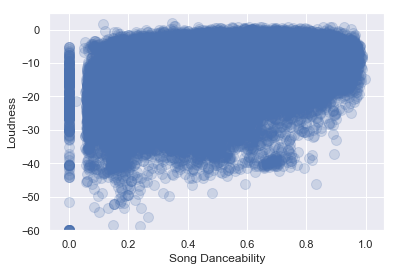

In [11]:
# Scatterplot two features
fig, ax = plt.subplots()
ax.scatter(spotify_df['danceability'], spotify_df['loudness'], alpha=0.2,
            s=100, cmap='inferno')
ax.set(xlabel="Song Danceability", ylabel="Loudness", ylim=(-60,5))
plt.show()

In [12]:
# Created new target based on whether a songs popularity is greater than or equal to 40
# 1 means the song is "hot" and "0" means song is not hot
spotify_df['hot'] = np.where(spotify_df['popularity'] >=40, '1', '0')

In [13]:
spotify_df.head()

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0      0.005820         0.743       238373   0.339             0.000    1   
1      0.024400         0.846       214800   0.557             0.000    8   
2      0.025000         0.603       138913   0.723             0.000    9   
3      0.029400         0.800       125381   0.579             0.912    5   
4      0.000035         0.783       124016   0.792             0.878    7   

   liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
0    0.0812    -7.678     1       0.4090  203.927               4    0.118   
1    0.2860    -7.259     1       0.4570  159.009               4    0.371   
2    0.0824    -5.890     0       0.0454  114.966               4    0.382   
3    0.0994   -12.118     0       0.0701  123.003               4    0.641   
4    0.0332   -10.277     1       0.0661  120.047               4    0.928   

   popularity hot  
0          15   0  
1           0   0  
2          56   1  
3           0   0  
4           0   0

In [14]:
spotify_df.dtypes

acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
popularity            int64
hot                  object
dtype: object

In [15]:
#converted feature type from object to int64
spotify_df['hot'] = pd.to_numeric(spotify_df['hot'])

In [16]:
spotify_df.dtypes

acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
popularity            int64
hot                   int64
dtype: object

In [17]:
# returns back list of songs that are "hot"
spotify_df.loc[spotify_df["hot"] > 0]

acousticness  danceability  duration_ms  energy  instrumentalness  \
2           0.025000        0.6030       138913   0.723          0.000000   
46          0.209000        0.7090       184546   0.576          0.000003   
48          0.925000        0.6110       217466   0.238          0.000004   
49          0.061700        0.9350       171383   0.756          0.000008   
50          0.122000        0.5520       241160   0.789          0.000005   
53          0.000026        0.1210       226906   0.982          0.018700   
54          0.157000        0.6860       210005   0.873          0.000003   
56          0.774000        0.5230       258255   0.615          0.000020   
58          0.019800        0.7130       185969   0.937          0.000000   
60          0.027100        0.8900       200168   0.454          0.000004   
66          0.239000        0.9140       184130   0.565          0.000000   
67          0.003610        0.9420       152655   0.736          0.000000   
78          0.039000        0.7750       144000   0.685          0.000000   
145         0.315000        0.8420       121555   0.653          0.000000   
157         0.786000        0.5240       176135   0.307          0.000000   
160         0.572000        0.0971       103125   0.178          0.934000   
161         0.000912        0.4840       145382   0.929          0.096800   
165         0.153000        0.3620       224120   0.449          0.000177   
166         0.679000        0.7180       205822   0.695          0.000003   
168         0.023700        0.5860       207173   0.569          0.000000   
169         0.104000        0.5320       195920   0.723          0.000009   
173         0.207000        0.8440       178405   0.931          0.000000   
177         0.000087        0.5260       235779   0.482          0.557000   
178         0.652000        0.7480       195362   0.694          0.000000   
179         0.433000        0.3590       421244   0.573          0.001390   
180         0.696000        0.7830       251992   0.432          0.000001   
187         0.530000        0.5970       204080   0.722          0.000804   
188         0.379000        0.7350       186667   0.819          0.000000   
189         0.191000        0.6810       194120   0.514          0.020700   
191         0.002450        0.6950       166253   0.818          0.000003   
...              ...           ...          ...     ...               ...   
130632      0.406000        0.6680       124138   0.393          0.838000   
130633      0.149000        0.7270       184660   0.542          0.000000   
130634      0.828000        0.5330       168189   0.384          0.008490   
130635      0.516000        0.8090        81000   0.510          0.808000   
130636      0.803000        0.7620       144027   0.535          0.920000   
130637      0.881000        0.5410       219267   0.412          0.014900   
130639      0.149000        0.8300       207013   0.869          0.005760   
130640      0.522000        0.8690       191453   0.474          0.000000   
130641      0.032000        0.5580       246453   0.762          0.000000   
130642      0.722000        0.3140       248388   0.418          0.000007   
130643      0.279000        0.6540       205034   0.788          0.000000   
130644      0.749000        0.2820       133500   0.457          0.068600   
130645      0.016600        0.7910       161756   0.836          0.000718   
130646      0.139000        0.6760       225531   0.694          0.000003   
130647      0.000060        0.4860       274933   0.924          0.000389   
130648      0.662000        0.8150        60000   0.219          0.000000   
130649      0.105000        0.2940       388600   0.652          0.001960   
130650      0.056800        0.7200       229773   0.830          0.000000   
130651      0.319000        0.6980       358765   0.801          0.000000   
130652      0.038200        0.6940       195492   0.669          0.021000   
1306

In [18]:
# removed "popularity" feature since "hot" feature will now be our target
spotify_df = spotify_df.drop("popularity", axis=1)
spotify_df.head()

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0      0.005820         0.743       238373   0.339             0.000    1   
1      0.024400         0.846       214800   0.557             0.000    8   
2      0.025000         0.603       138913   0.723             0.000    9   
3      0.029400         0.800       125381   0.579             0.912    5   
4      0.000035         0.783       124016   0.792             0.878    7   

   liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
0    0.0812    -7.678     1       0.4090  203.927               4    0.118   
1    0.2860    -7.259     1       0.4570  159.009               4    0.371   
2    0.0824    -5.890     0       0.0454  114.966               4    0.382   
3    0.0994   -12.118     0       0.0701  123.003               4    0.641   
4    0.0332   -10.277     1       0.0661  120.047               4    0.928   

   hot  
0    0  
1    0  
2    1  
3    0  
4    0

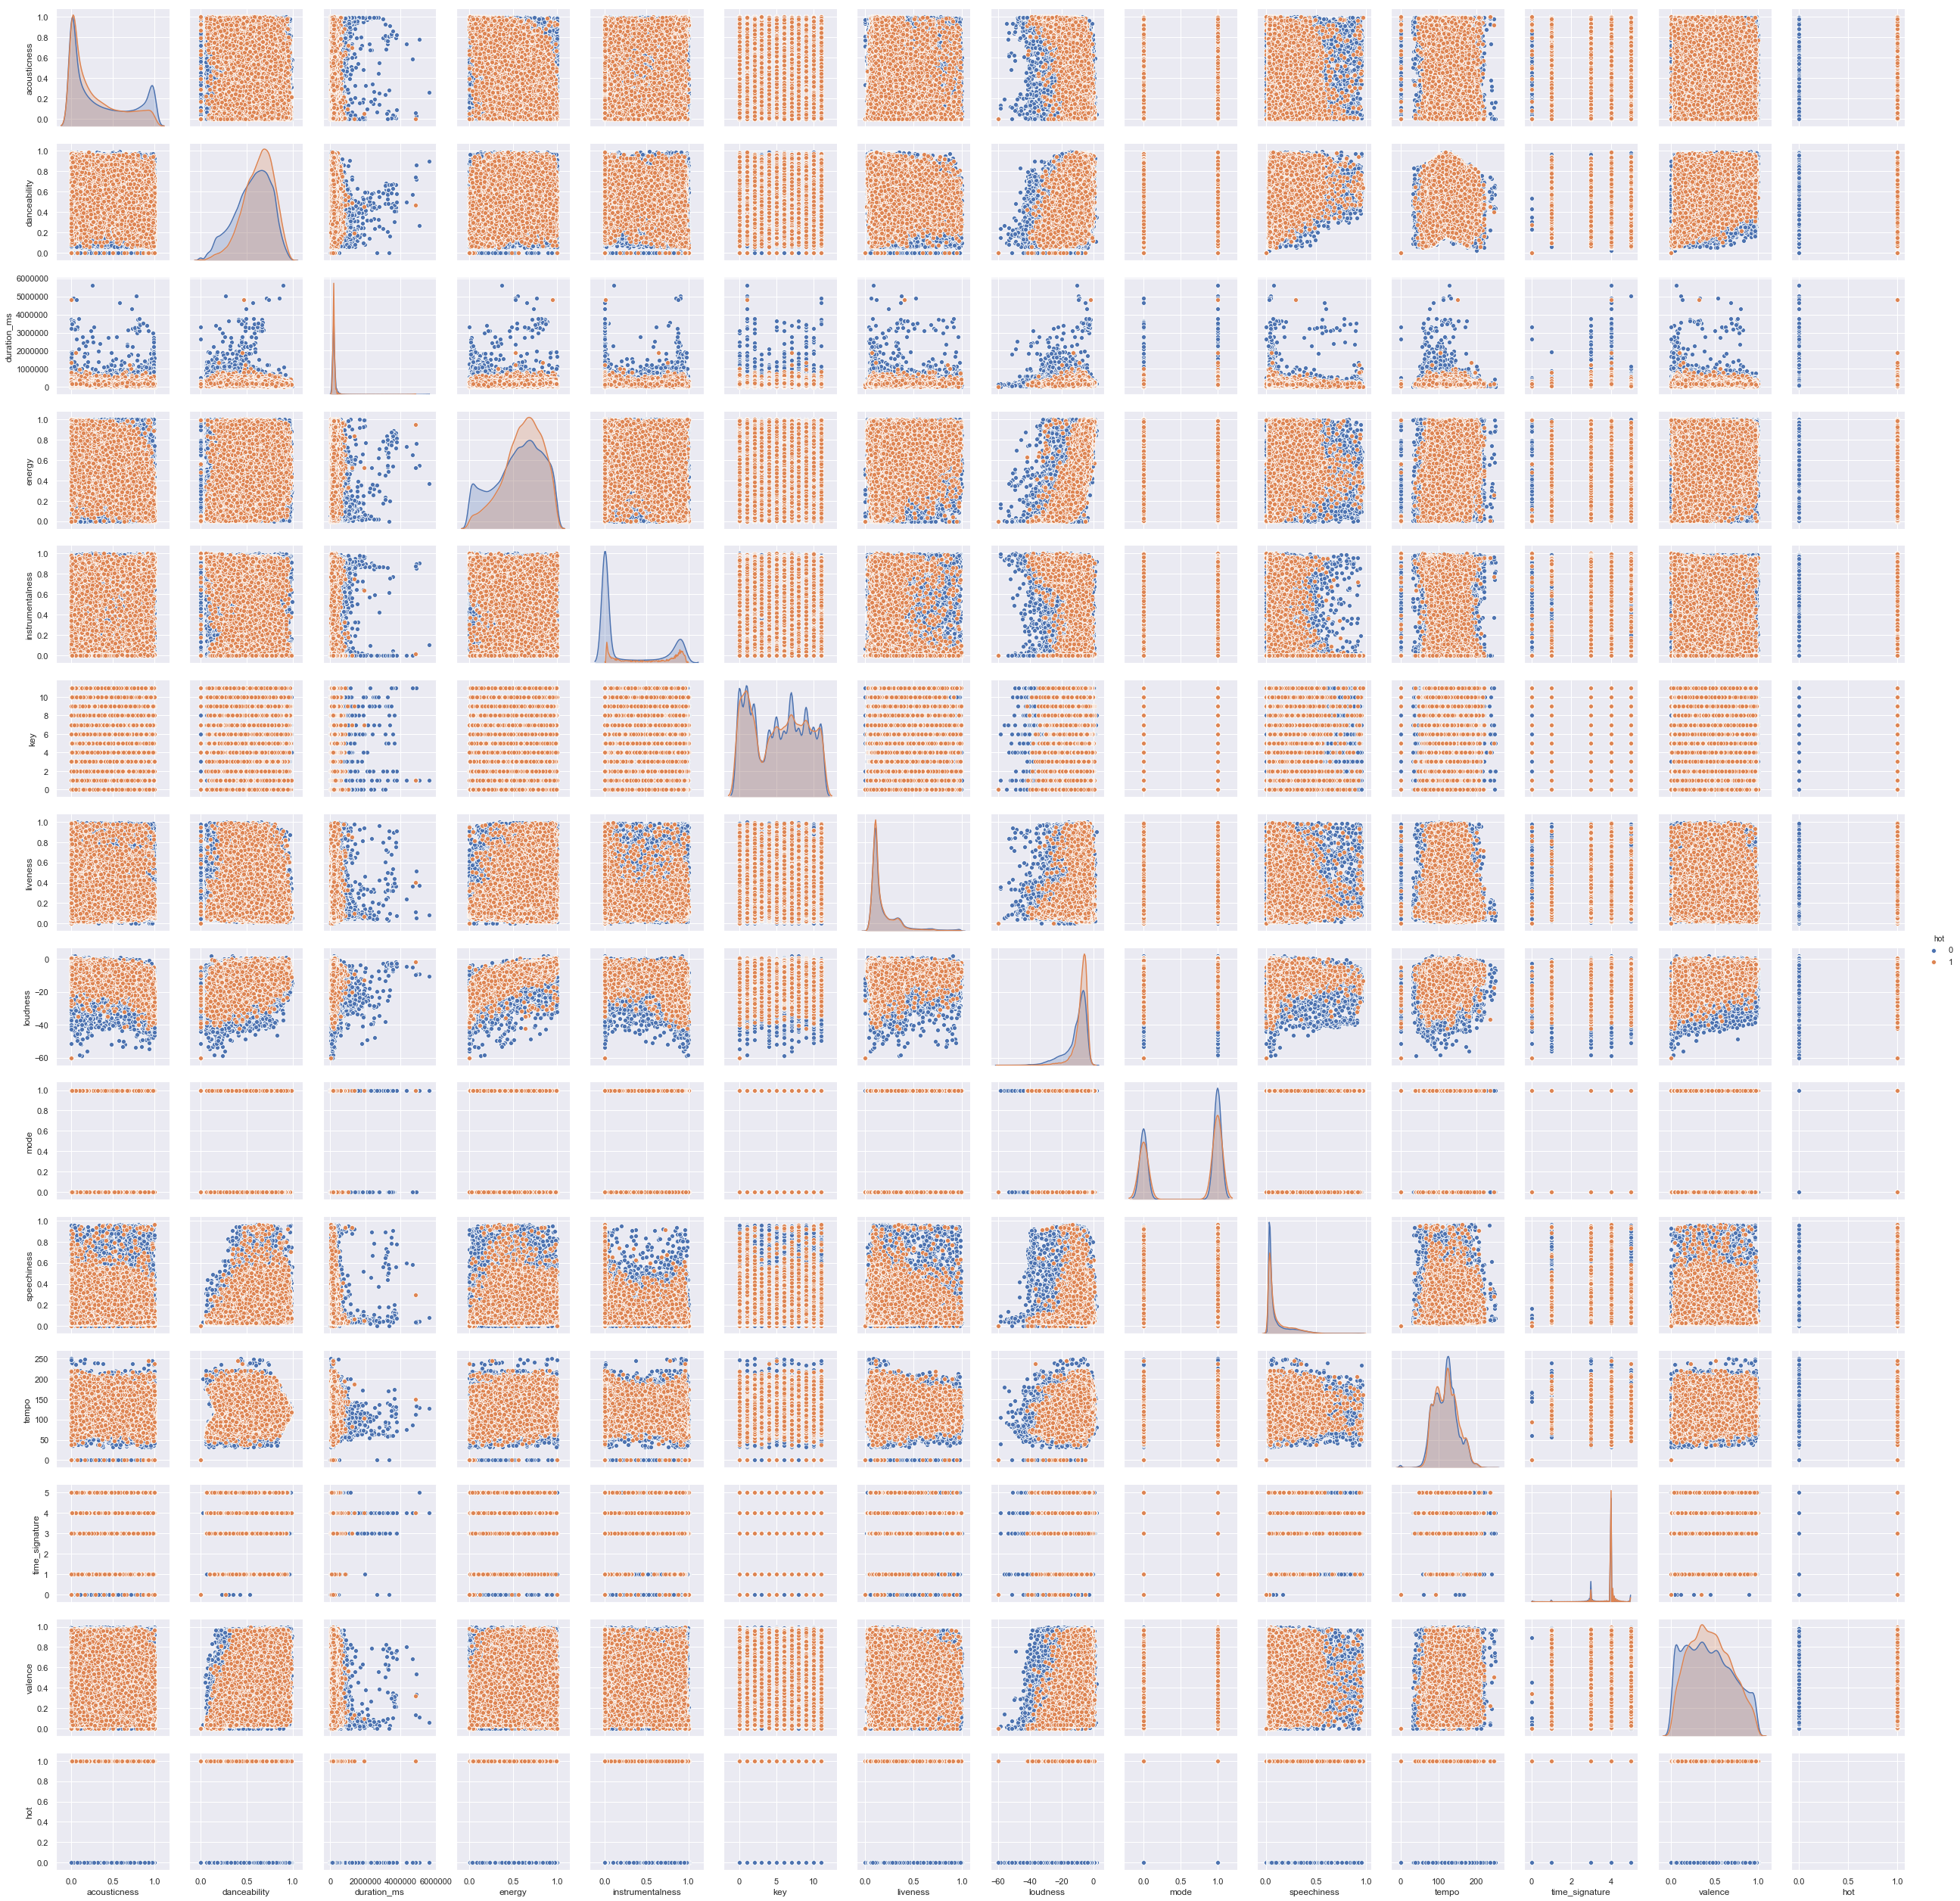

In [19]:
import warnings
warnings.filterwarnings('ignore')
pair_plot = sns.pairplot(spotify_df, hue='hot')

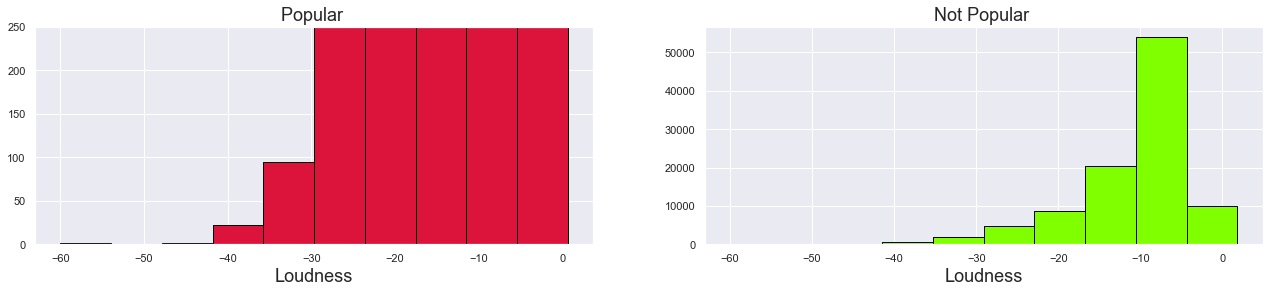

In [20]:
# Histogram
fig, ax = plt.subplots(1, 2, figsize=(22,4))
ax[0].hist(spotify_df.loc[spotify_df['hot'] == True, "loudness"], color = 'crimson', edgecolor='black')
ax[0].set_title('Popular ', fontsize = 18) 
ax[0].set_xlabel('Loudness', fontsize = 18)

ax[0].set_ylim(0,250)
ax[1].hist(spotify_df.loc[spotify_df['hot'] == False, "loudness"], color = 'chartreuse', edgecolor='black')
ax[1].set_title('Not Popular ', fontsize = 18)
ax[1].set_xlabel('Loudness', fontsize = 18)


# Density Plot
fig, ax = plt.subplots(figsize=(22,4))
ax = sns.kdeplot(spotify_df.loc[spotify_df['hot'] == True, "loudness"], shade=True, color=sns.xkcd_rgb["red"], label="Popular")
ax = sns.kdeplot(spotify_df.loc[spotify_df['hot'] == False, "loudness"], shade=True, color=sns.xkcd_rgb["green"], label="Not Popular")
ax.set_title('Loudess Distribution by Popular or Not Popular', fontsize = 18)
ax.set_ylabel('Density', fontsize = 18)
ax.set_xlabel('Loudness', fontsize = 18)
plt.legend(fontsize=24)
plt.show()

In [23]:
# saved copy of cleaned file
spotify_df.to_csv("clean_spotify.csv")

In [21]:
# Put all features used for predicting into X
X = spotify_df.iloc[:,:-1].values
X[:5]

array([[ 5.82000e-03,  7.43000e-01,  2.38373e+05,  3.39000e-01,
         0.00000e+00,  1.00000e+00,  8.12000e-02, -7.67800e+00,
         1.00000e+00,  4.09000e-01,  2.03927e+02,  4.00000e+00,
         1.18000e-01],
       [ 2.44000e-02,  8.46000e-01,  2.14800e+05,  5.57000e-01,
         0.00000e+00,  8.00000e+00,  2.86000e-01, -7.25900e+00,
         1.00000e+00,  4.57000e-01,  1.59009e+02,  4.00000e+00,
         3.71000e-01],
       [ 2.50000e-02,  6.03000e-01,  1.38913e+05,  7.23000e-01,
         0.00000e+00,  9.00000e+00,  8.24000e-02, -5.89000e+00,
         0.00000e+00,  4.54000e-02,  1.14966e+02,  4.00000e+00,
         3.82000e-01],
       [ 2.94000e-02,  8.00000e-01,  1.25381e+05,  5.79000e-01,
         9.12000e-01,  5.00000e+00,  9.94000e-02, -1.21180e+01,
         0.00000e+00,  7.01000e-02,  1.23003e+02,  4.00000e+00,
         6.41000e-01],
       [ 3.52000e-05,  7.83000e-01,  1.24016e+05,  7.92000e-01,
         8.78000e-01,  7.00000e+00,  3.32000e-02, -1.02770e+01,
         1.0

In [24]:
# Set target into y
y = spotify_df.iloc[:,-1].values
y[:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [25]:
# Split data into test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3, stratify=y)

In [26]:
X_train.shape, X_test.shape

((91464, 13), (39199, 13))

In [27]:
# scale features
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test) 
X_train_std[:5]

array([[ 1.20391025,  0.42280775,  0.06487352, -1.07338092, -0.62086946,
        -1.17812126, -0.45530942, -0.19309581,  0.80315973, -0.52341038,
        -0.6505243 ,  0.2365714 , -1.0610315 ],
       [-0.93161692, -0.67147693,  0.32380393,  1.09409388, -0.62095115,
         0.48929099, -0.46129319,  0.4118475 , -1.24508234,  2.05434262,
         1.75267865,  0.2365714 ,  0.41296413],
       [-0.90904631,  0.48067858,  0.98812278,  1.35542063, -0.62094481,
        -1.17812126, -0.47924451,  0.93876322, -1.24508234,  0.36932494,
        -0.90143507,  0.2365714 ,  0.03867728],
       [-0.93277439,  0.64903007,  0.23439381, -0.40469188, -0.62095115,
         1.60089915, -0.15612075,  0.10233806, -1.24508234,  1.50347145,
         0.80536789,  0.2365714 , -0.91826229],
       [-0.98961471,  1.04360387,  1.15047231,  0.77512153,  0.87110419,
         1.60089915, -0.68149605,  0.07755282, -1.24508234, -0.59388949,
         0.11523072,  0.2365714 ,  1.19240685]])

In [28]:
# Select some algorithms
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1)

# Support Vector Machine
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, random_state=0)

# k-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

# Neural Network
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()

In [29]:
# Checked which feature is most important
forest.fit(X_train, y_train)
feature_importance = forest.feature_importances_

In [30]:
feature_importance

array([0.09147553, 0.09127302, 0.09689437, 0.09424792, 0.0832227 ,
       0.0475456 , 0.08661825, 0.11851875, 0.01233806, 0.08820715,
       0.09183611, 0.00853039, 0.08929214])

In [31]:
feature_importance.shape

(13,)

In [32]:
# Not surprising loudness is the most important feature, "Loudness War"?
best_features = pd.DataFrame(feature_importance.reshape(1,-1), columns=spotify_df.columns[:-1], index = ["importance"])
best_features

acousticness  danceability  duration_ms    energy  \
importance      0.091476      0.091273     0.096894  0.094248   

            instrumentalness       key  liveness  loudness      mode  \
importance          0.083223  0.047546  0.086618  0.118519  0.012338   

            speechiness     tempo  time_signature   valence  
importance     0.088207  0.091836         0.00853  0.089292

In [33]:
# 10-fold cross validation with a signle algorithm
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, X_train_std, y_train, scoring='accuracy', cv=10)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())               
    print("Standard deviation:", scores.std())  

In [34]:
display_scores(scores)

Scores: [0.76965125 0.77085383 0.77041653 0.77041653 0.77074451 0.77071944
 0.7706101  0.7706101  0.77126613 0.77189721]
Mean: 0.7707185634655757
Standard deviation: 0.0005525521662682398


In [35]:
# 10-fold cross validation with selected algorithms
classifiers = [log_reg, knn, forest, nn]

model_scores = []
for clf in classifiers:
    model_scores.append(cross_val_score(clf, X_train_std, y_train, scoring='accuracy', cv=10))

In [36]:
# View the cross validation results using a DataFrame
models_df = pd.DataFrame(model_scores, columns=[1,2,3,4,5,6,7,8,9,10],
                               index=["LR", "KNN", "Forest", "NN"])
models_df

1         2         3         4         5         6         7   \
LR      0.769651  0.770854  0.770417  0.770417  0.770745  0.770719  0.770610   
KNN     0.736963  0.736854  0.733793  0.737182  0.740899  0.739121  0.743166   
Forest  0.760796  0.761670  0.761561  0.764404  0.758937  0.762738  0.758036   
NN      0.767465  0.769214  0.771400  0.771510  0.765716  0.766893  0.765581   

              8         9         10  
LR      0.770610  0.771266  0.771897  
KNN     0.738246  0.735294  0.741717  
Forest  0.759348  0.760879  0.764024  
NN      0.764925  0.768423  0.769820

In [37]:
# add "Mean" Column to the End of the Dataframe
models_df["Mean"] = models_df.mean(axis=1)
models_df

1         2         3         4         5         6         7  \
LR      0.769651  0.770854  0.770417  0.770417  0.770745  0.770719  0.770610   
KNN     0.736963  0.736854  0.733793  0.737182  0.740899  0.739121  0.743166   
Forest  0.760796  0.761670  0.761561  0.764404  0.758937  0.762738  0.758036   
NN      0.767465  0.769214  0.771400  0.771510  0.765716  0.766893  0.765581   

               8         9        10      Mean  
LR      0.770610  0.771266  0.771897  0.770719  
KNN     0.738246  0.735294  0.741717  0.738323  
Forest  0.759348  0.760879  0.764024  0.761239  
NN      0.764925  0.768423  0.769820  0.768095

In [38]:
#skip boxplot so I can run and save the model
# Boxplot to visually compare performance

#fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 8))
# rectangular box plot
#bplot_models = axes.boxplot(model_scores, vert=True, patch_artist=True)

# fill with colors - Models
#colors_d = ["lightgreen", "lightyellow", "lime", "yellow", "yellowgreen"]
#for patch, color in zip(bplot_models['boxes'], colors_d):
 #   patch.set_facecolor(color)
    
    # adding axes labels
#axes.yaxis.grid(True)
#axes.set_xticks([y+1 for y in range(len(model_scores))])
#axes.set_xlabel('Classification Models', fontsize=18)
#axes.set_ylabel('Accuracy', fontsize=18)
#axes.set_ylim((.4, 1.1))
#axes.set_title('Classification Accuracy', fontsize = 18)

# add x-tick labels
#plt.setp(axes, xticks=[y+1 for y in range(len(model_scores))],xticklabels=['LR', 'KNN', 'RF', 'NN'])

# increase tick size
#y_ticks = axes.get_yticklabels()
#x_ticks = axes.get_xticklabels()

#for x in x_ticks: 
 #   x.set_fontsize(18)       
#for y in y_ticks:
 #   y.set_fontsize(18)

### Test algorithms on Train and Test Data Sets, Compare Results. (Should I be using X_train_std or X_train?)

In [39]:
log_reg = LogisticRegression()
log_reg.fit(X_train_std, y_train)
train_score = log_reg.score(X_train_std, y_train)
test_score = log_reg.score(X_test_std, y_test)
print("Train score: {} \nTest score: {}".format(train_score,test_score))

Train score: 0.7707841336482113 
Test score: 0.7706063930202302


In [40]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)
print("Train score: {} \nTest score: {}".format(train_score,test_score))

Train score: 0.7988388874311204 
Test score: 0.725707288451236


In [41]:
forest = RandomForestClassifier(n_estimators=10, random_state=0)
forest.fit(X_train, y_train)
train_score = forest.score(X_train, y_train)
test_score = forest.score(X_test, y_test)
print("Train score: {} \nTest score: {}".format(train_score,test_score))

Train score: 0.9795547975159625 
Test score: 0.7612183984285313


In [42]:
nn = MLPClassifier()
nn.fit(X_train, y_train)
train_score = nn.score(X_train, y_train)
test_score = nn.score(X_test, y_test)
print("Train score: {} \nTest score: {}".format(train_score,test_score))

Train score: 0.7710027989154202 
Test score: 0.7709635449883926


In [43]:
#Grid Search KNN 
from sklearn.model_selection import GridSearchCV
param_range = [0.0001, 0.001, .005, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
gs = GridSearchCV(estimator=knn, param_grid=[{'weights': ['distance', 'uniform'], 'n_neighbors': [3, 5, 7]}], scoring='accuracy', cv=3)
gs.fit(X_train, y_train)
train_score = gs.score(X_train, y_train)
test_score = gs.score(X_test, y_test)
print("Train score: {} \nTest score: {}".format(train_score, test_score))

Train score: 0.7868997638415114 
Test score: 0.7409372688078778


In [44]:
#View the parameters that were dettermined to be the best following the GridSearch

gs.best_params_

{'n_neighbors': 7, 'weights': 'uniform'}

              precision    recall  f1-score   support

     Not Hot       0.79      0.88      0.83     30222
         Hot       0.35      0.21      0.26      8977

   micro avg       0.73      0.73      0.73     39199
   macro avg       0.57      0.55      0.55     39199
weighted avg       0.69      0.73      0.70     39199



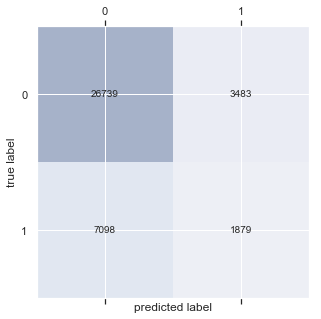

In [45]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

# Precision, Recall, and F1 scores
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred)

#print('Precision: {:.3f}, Recall: {:.3f}, F1: {:.3f}'.format(precision, recall, f1))
print(classification_report(y_test, y_pred, target_names=["Not Hot", "Hot"]))

In [46]:
print(spotify_df.groupby('hot').size())

hot
0    100741
1     29922
dtype: int64


In [47]:
#make sure i skip the boxplot area, y gets changed there, I can rename y in the boxplot and then it can work
from sklearn.externals import joblib

#X_new_data =

# scale/standardize X (the original full dataset)
X_std = stdsc.fit_transform(X)

knn.fit(X_std, y)

# save the model to disk
joblib.dump(knn, 'final_knn_model.sav')
 
# load the model from disk
knn_from_saved = joblib.load('final_knn_model.sav')

# use the model as before
predictions = knn_from_saved.predict(X_std)

### Conclusion